# Outputs for presentation and manuscript

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as geopd
import polars as pl

from matplotlib.ticker import FuncFormatter, MaxNLocator

In [11]:
# Load black for formatting
import jupyter_black

jupyter_black.load()

ModuleNotFoundError: No module named 'jupyter_black'

In [2]:
df_alpha = pl.read_parquet("../../data/output/alpha_diversity/alpha_all_species.parquet")
df_alpha.head()

SS,SSB,SSBS,Abundance,Study_max_abundance,Max_scaled_abundance,Mean_abundance,Study_max_mean_abundance,Max_scaled_mean_abundance,Species_richness,Study_max_richness,Max_scaled_species_richness,Shannon_index,Site_abundance,Modified_Shannon_index,Study_max_Shannon,Study_max_modified_Shannon,Max_scaled_Shannon_index,Max_scaled_modified_Shannon,Longitude,Latitude,Country,UN_region,UN_subregion,Realm,Biome,Ecoregion,Wilderness_area,Hotspot,Sample_midpoint,Sampling_method,Sampling_effort,Rescaled_sampling_effort,Max_linear_extent_metres,Family,Diversity_metric_type,Predominant_land_use,…,Pop_density_10km_cbrt,Pop_density_50km_log,Pop_density_50km_sqrt,Pop_density_50km_cbrt,Road_density_1km_log,Road_density_1km_sqrt,Road_density_1km_cbrt,Road_density_10km_log,Road_density_10km_sqrt,Road_density_10km_cbrt,Road_density_50km_log,Road_density_50km_sqrt,Road_density_50km_cbrt,Mean_pop_density_1km,Mean_pop_density_10km,Mean_pop_density_50km,Mean_road_density_1km,Mean_road_density_10km,Mean_road_density_50km,Mean_pop_density_1km_log,Mean_pop_density_1km_sqrt,Mean_pop_density_1km_cbrt,Mean_pop_density_10km_log,Mean_pop_density_10km_sqrt,Mean_pop_density_10km_cbrt,Mean_pop_density_50km_log,Mean_pop_density_50km_sqrt,Mean_pop_density_50km_cbrt,Mean_road_density_1km_log,Mean_road_density_1km_sqrt,Mean_road_density_1km_cbrt,Mean_road_density_10km_log,Mean_road_density_10km_sqrt,Mean_road_density_10km_cbrt,Mean_road_density_50km_log,Mean_road_density_50km_sqrt,Mean_road_density_50km_cbrt
str,str,str,f64,f64,f64,f64,f64,f64,u32,u32,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,str,str,str,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""SH1_2002__Sheil 1""","""SH1_2002__Sheil 1 ""","""SH1_2002__Sheil 1 136""",41.0,124.0,0.330645,0.032385,0.097946,0.330645,1266,1266,1.0,3.713572,41.0,13.880105,4.697304,22.680057,0.790575,0.611996,116.548843,3.326746,"""Indonesia""","""Asia""","""South-Eastern Asia""","""Indo-Malay""","""Tropical & Subtropical Moist B…","""Sundaland Heath Forests""",null,"""Sundaland""","""2000-11-20""","""fixed plots/quadrats""",200.0,1.0,40.0,"""Passifloraceae""","""Abundance""","""Intermediate secondary vegetat…",…,0.994177,1.207146,1.530989,1.328357,0.0,0.0,0.0,12.23282,453.233508,59.003984,15.807623,2707.581964,194.261949,0.982633,0.982641,2.243022,1868.973836,233765.425031,7.2154e6,0.684426,0.991278,0.994177,0.68443,0.991282,0.99418,1.174705,1.496254,1.307904,4.454997,30.495872,7.961122,12.276728,473.249649,60.440678,15.791438,2685.956971,193.223061
"""DI1_2013__deLima 2""","""DI1_2013__deLima 2 ""","""DI1_2013__deLima 2 190""",8.0,73.0,0.109589,0.069565,0.634783,0.109589,115,115,1.0,1.732868,8.0,3.8075,2.635892,10.51453,0.657412,0.362118,6.594143,0.30138,"""Sao Tome and Principe""","""Africa""","""Middle Africa""","""Afrotropic""","""Tropical & Subtropical Moist B…","""Sao Tome And Principe Moist Lo…",null,"""Guinean Forests of West Africa""","""2009-11-14""","""visual encounter survey""",0.05,1.0,40.0,null,"""Abundance""","""Primary vegetation""",…,5.33858,5.445531,15.189477,6.133314,8.465324,68.89316,16.805473,12.650489,558.493535,67.818071,15.756705,2639.520525,190.992668,493.415194,457.82552,230.720219,2508.86917,404042.568479,7.1965e6,5.55104,18.146163,6.681725,5.987808,20.720268,7.48288,5.445531,15.189477,6.133314,6.647963,43.682753,11.623301,12.894895,633.379315,73.693264,15.788381,2682.1483,193.035671
"""YP1_2004__Gu 1""","""YP1_2004__Gu 1 1""","""YP1_2004__Gu 1 1 2""",11.0,31.0,0.354839,0.578947,1.631579,0.354839,19,19,1.0,1.263654,11.0,3.140063,2.098147,5.799851,0.602272,0.541404,114.841667,36.579167,"""China""","""Asia""","""Eastern Asia""","""Palearctic""","""Temperate Broadleaf & Mixed Fo…","""Huang He Plain Mixed Forests""",null,null,"""1997-07-02""","""pit-fall traps""",150.0,1.0,4.242641,"""Carabidae""","""Abundance""","""Cropland""",…,8.627715,6.692952,28.384853

In [31]:
df_alpha.shape

(31097, 157)

# 1. Evaluation of response variable and normalization approach


## Distribution of scaled diversity metrics

In [3]:
def plot_two_histograms(df, data_cols, titles):
    # Set up the figure and axes
    fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
    sns.set_style('ticks')
    grid_params = {'color': 'grey', 'linestyle': '-', 'linewidth': 0.5, "alpha": 0.5}

    # Shared formatting variables
    ylabel = "Frequency"
    xlabel = "Relative diversity 0-1"
    bins = 50
    alpha = 0.8
    title_size = 14
    label_size = 12
    
    # Plot the first histogram with density
    sns.histplot(
        df.select(pl.col(data_cols[0])),
        bins=bins,
        kde=True,
        ax=axes[0],
        legend=False,
        color="blue",
        alpha=alpha,
    )
    sns.despine()
    axes[0].set_title(titles[0], fontsize=title_size)
    axes[0].set_xlabel(xlabel, fontsize=label_size)
    axes[0].set_ylabel(ylabel, fontsize=label_size)
    axes[0].grid(True, which='major', axis="y", **grid_params)
    
    # Plot the second histogram with density
    sns.histplot(
        df.select(pl.col(data_cols[1])),
        bins=bins,
        kde=True,
        ax=axes[1],
        legend=False,
        color="green",
        alpha=alpha,
    )
    sns.despine()
    axes[1].set_title(titles[1], fontsize=title_size)
    axes[1].set_xlabel(xlabel, fontsize=label_size)
    axes[1].set_ylabel("")
    axes[1].grid(True, which='major', axis="y", **grid_params)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

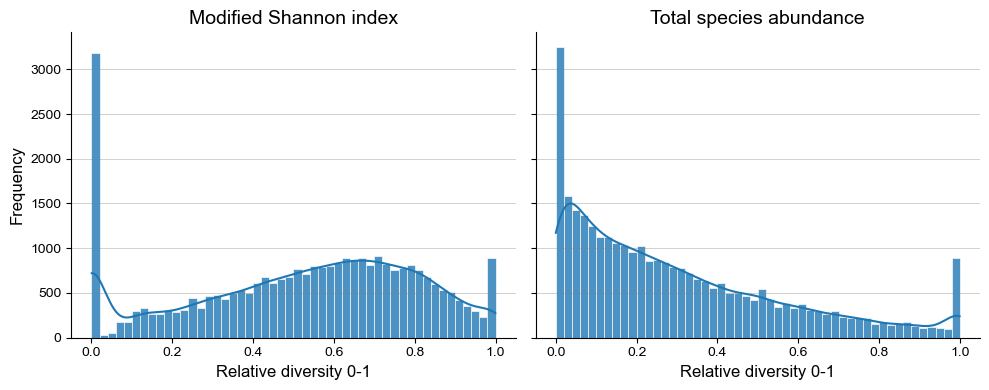

In [4]:
data_cols = ["Max_scaled_modified_Shannon", "Max_scaled_abundance"] 
titles = ["Modified Shannon index", "Total species abundance"]
plot_two_histograms(df_alpha, data_cols, titles)

## Distribution per land use type

In [14]:
def plot_violin_two_columns(df, data_cols, labels):

    category_col = "Predominant_land_use"
    category_order = [
        "Primary vegetation",
        "Mature secondary vegetation",
        "Intermediate secondary vegetation",
        "Young secondary vegetation",
        "Secondary vegetation (indeterminate age)",
        "Plantation forest",
        "Pasture",
        "Cropland",
        "Urban",
    ]
    reference_category = "Primary vegetation"
    df = df.filter(pl.col("Predominant_land_use") != "Cannot decide")

    # Calculate means for each column in the reference category
    means = [
        df.filter(pl.col(category_col) == reference_category)
        .select(pl.col(data_col).mean())
        .item()
        for data_col in data_cols
    ]
    print(means)

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
    sns.set_style('ticks')
    grid_params = {'color': 'grey', 'linestyle': '-', 'linewidth': 0.5, "alpha": 0.5}

    # Shared formatting variables
    alpha = 0.6
    title_size = 14
    label_size = 12

    # Plot the first data column
    sns.violinplot(
        data=df,
        x=category_col,
        y=data_cols[0],
        order=category_order,
        ax=axes[0],
        cut=0,
        color="blue",
        alpha=alpha,
    )
    sns.despine()
    axes[0].axhline(means[0], color="blue", linestyle="--", linewidth=1.5)
    axes[0].set_title(titles[0], fontsize=title_size)
    axes[0].set_xlabel("")
    axes[0].set_ylabel("Relative diversity 0-1")
    axes[0].tick_params(axis="x", rotation=45) 
    axes[0].grid(True, which='major', axis="y", **grid_params)

    # Plot the second data column
    sns.violinplot(
        data=df,
        x=category_col,
        y=data_cols[1],
        order=category_order,
        ax=axes[1],
        cut=0,
        color="green",
        alpha=alpha,
    )
    sns.despine()
    axes[1].axhline(means[1], color="green", linestyle="--", linewidth=1.5)
    axes[1].set_title(titles[1], fontsize=title_size)
    axes[1].set_xlabel("")
    axes[1].set_ylabel("") 
    axes[1].tick_params(axis="x", rotation=45)  
    axes[1].grid(True, which='major', axis="y", **grid_params)
    
    # Adjust layout for spacing
    plt.tight_layout()
    plt.show()

[nan, 0.35303751997406324]


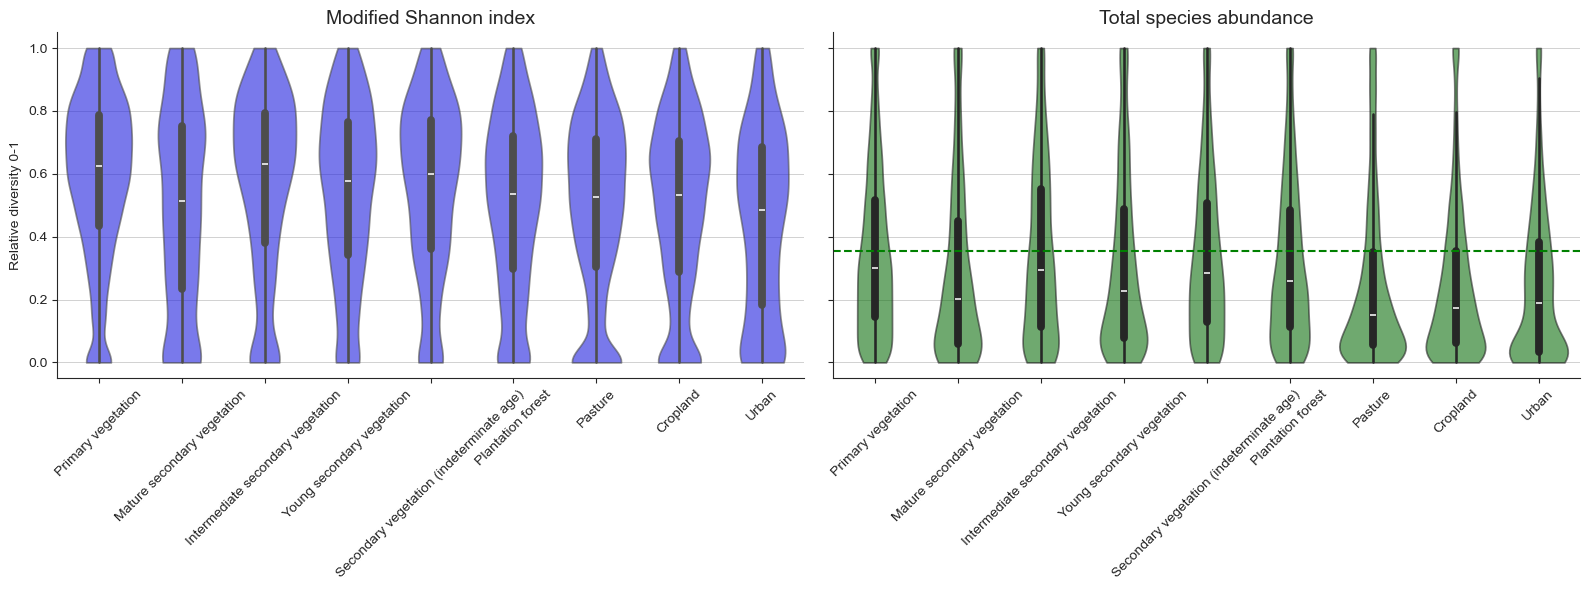

In [15]:
data_cols = ["Max_scaled_modified_Shannon", "Max_scaled_abundance"] 
titles = ["Modified Shannon index", "Total species abundance"]
plot_violin_two_columns(df_alpha, data_cols, titles)

In [14]:
def _number_formatter(max_val):
    """Return a formatter function based on the maximum value in the data."""

    def formatter(value, *args):
        if max_val <= 10:
            return f"{value:.1f}"
        else:
            return f"{value:,.0f}"

    return formatter

In [9]:
def plot_histogram_with_density(
    df: pl.DataFrame,
    data_col: str,
    title: str,
    xlabel: str,
    bins: int = 50,
    kde: bool = True,
    lower_lim: int = None,
    upper_lim: int = None,
    figsize: tuple = (10, 6),
    style: str = "dark",
) -> None:
    """
    Plots a histogram with a density overlay for the specified column of a DataFrame.

    Args:
        df: Dataframe containing the data for plotting.
        data_col: The name of the column to plot.
        xlabel: The label for the x-axis.
        title: The title for the plot.
        bins: The number of bins to use for the histogram. Defaults to 50.
        kde: Whether to overlay a kernel density estimate. Defaults to True.
        lower_lim: Smallest value to display in the plot. Defaults to None.
        upper_lim: Largest value to display in the plot. Defaults to None.
        figsize: The size of the plot. Defaults to (10, 6).
        style: The seaborn visual style for the plot. Defaults to 'dark'.
    """
    assert data_col in df.columns, "Dataframe must contain data_col"

    # Filter the dataframe for the lower and upper thresholds
    if lower_lim:
        df = df.filter(pl.col(data_col) >= lower_lim)
    if upper_lim:
        df = df.filter(pl.col(data_col) <= upper_lim)

    # Calculate the maximum value in the data and get formatter
    max_val = df.select(pl.col(data_col).max()).item()
    formatter = _number_formatter(max_val)

    # Set figure style and create plot
    sns.set_style(style)
    sns.set()
    plt.figure(figsize=figsize)
    ax = sns.histplot(df.select(data_col), bins=bins, kde=kde, legend=False)

    # Set formatting
    ax.xaxis.set_major_formatter(FuncFormatter(formatter))
    ax.yaxis.set_major_formatter(FuncFormatter(formatter))
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")

    plt.show()

In [12]:
def plot_violin(
    df: pl.DataFrame,
    data_col: str,
    title: str,
    category_col: str = "Predominant_land_use",
    figsize: tuple = (10, 6),
) -> None:
    """
    Creates a violin plot for a numerical column grouped by categories, with a reference line.

    Args:
        df: Polars DataFrame containing the data for plotting.
        data_col: The column containing numerical values to plot.
        category_col: The categorical column for grouping data. Defaults to "Predominant_land_use".
        figsize: Size of the figure (width, height). Defaults to (12, 6).
    """
    # Define category order and reference category for land use
    if category_col == "Predominant_land_use":
        category_order = [
            "Primary vegetation",
            "Mature secondary vegetation",
            "Intermediate secondary vegetation",
            "Young secondary vegetation",
            "Secondary vegetation (indeterminate age)",
            "Plantation forest",
            "Pasture",
            "Cropland",
            "Urban",
            "Cannot decide",
        ]
        reference_category = "Primary vegetation"

    # Calculate the mean value for the reference category
    reference_mean = (
        df.filter(pl.col(category_col) == reference_category)
        .select(pl.col(data_col).mean())
        .item()
    )

    # Create the plot
    plt.figure(figsize=figsize)
    sns.violinplot(
        data=df,  # Directly convert Polars DataFrame to Pandas for Seaborn
        x=category_col,
        y=data_col,
        order=category_order,
        cut=0,
    )

    # Add a reference line for the mean of the reference category
    plt.axhline(
        y=reference_mean,
        color="red",
        linestyle="--",
        linewidth=1,
        label=f"Mean ({reference_category}): {reference_mean:.2f}",
    )

    # Add labels, title, and ticks
    plt.title(title, fontsize=14)
    plt.xlabel(category_col, fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.legend(loc="upper right")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Display the plot
    plt.tight_layout()
    plt.show()